<a href="https://www.kaggle.com/code/sjagkoo7/predict-co2-emissions-s3ep20?scriptVersionId=140254862" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
The objective of this challenge is to create a machine learning models using open-source CO2 emissions data from Sentinel-5P satellite observations to predict future carbon emissions.
We are using historical data from January 1st, 2019 until December 31st, 2021 to train our models.

# Importing Libraries 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import profile_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


In [2]:
# setting defualt max row display 100 
pd.set_option('display.max_rows', 100)

# Reading the Dataset

In [3]:
#Reading the dataset uing read_csv
sample_submission=pd.read_csv('/kaggle/input/playground-series-s3e20/sample_submission.csv')
train=pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')

In [4]:
#displaying first 2 rows of sample output
sample_submission.head(2)

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94
1,ID_-0.510_29.290_2022_01,81.94


In [5]:
#displaying first 5 rows of trianing data
train.head(2)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176


In [6]:
#displaying first 5 rows of test data
test.head(2)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.0,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380


In [7]:
# checking details of training feature like no of rows, total columns along with column name , total non- null values in feature.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

* `By  seeing this there are lot's of  null values in training dataset we have to handle this. will see in coming cells`
* `There are no categorical data all are numerical.`

In [8]:
# checking details of training feature like no of rows, total columns along with column name , total non- null values in feature.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

* `By  seeing this there are lot's of  null values in test dataset we have to handle this. will see in coming cells`.
* `There are no categorical data all are numerical.`

In [9]:
#general info on train datset
# train.size
#train.shape
#len(train)
train.columns.to_list()
#len(train.columns)

['ID_LAT_LON_YEAR_WEEK',
 'latitude',
 'longitude',
 'year',
 'week_no',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDio

# Data Pre-Processing

In [10]:
train_df=train.copy()
test_df=test.copy()

In [11]:
# dropping the feature ID_LAT_LON_YEAR_WEEK 
train_df=train_df.drop('ID_LAT_LON_YEAR_WEEK',axis=1)
ID_LAT_LON_YEAR_WEEK=test_df['ID_LAT_LON_YEAR_WEEK']
test_df=test_df.drop('ID_LAT_LON_YEAR_WEEK',axis=1)

# Count , Unique & Null values 

In [12]:
# Train dataset
train_desc=pd.DataFrame(index=list(train_df))
train_desc['Count']=train_df.count()
train_desc['nunique']=train_df.nunique()
train_desc['%unique']=train_desc['nunique'] / len(train) * 100
train_desc['null']=train_df.isna().sum()
train_desc['type']=train_df.dtypes
train_desc=pd.concat([train_desc,train_df.describe().T.drop('count',axis=1)],axis=1)#count - is output column when we apply describe 
train_desc

,Count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
latitude,79023,452,0.571985,0,float64,-1.891072,0.694522,-3.299000,-2.451000,-1.882000,-1.303000,-0.510000
longitude,79023,453,0.573251,0,float64,29.880155,0.810375,28.228000,29.262000,29.883000,30.471000,31.532000
year,79023,3,0.003796,0,int64,2020.000000,0.816502,2019.000000,2019.000000,2020.000000,2021.000000,2021.000000
week_no,79023,53,0.067069,0,int64,26.000000,15.297155,0.000000,13.000000,26.000000,39.000000,52.000000
SulphurDioxide_SO2_column_number_density,64414,64409,81.506650,14609,float64,0.000048,0.000272,-0.000996,-0.000096,0.000024,0.000153,0.004191
SulphurDioxide_SO2_column_number_density_amf,64414,64411,81.509181,14609,float64,0.834848,0.185382,0.241822,0.705817,0.809118,0.942792,1.885239
SulphurDioxide_SO2_slant_column_number_density,64414,64409,81.506650,14609,float64,0.000035,0.000206,-0.000887,-0.000078,0.000019,0.000121,0.004236
SulphurDioxide_cloud_fraction,64414,62367,78.922592,14609,float64,0.158418,0.071364,0.000000,0.110535,0.161855,0.211824,0.299998
SulphurDioxide_sensor_azimuth_angle,64414,64295,81.362388,14609,float64,-7.925870,64.263368,-179.537059,-56.782383,-12.441726,72.059990,122.095200
SulphurDioxide_sensor_zenith_angle,64414,64218,81.264948,14609,float64,37.436189,14.149950,0.099237,28.844520,37.784299,47.634875,66.242012


In [13]:
# Test dataset
test_desc=pd.DataFrame(index=list(test_df))
test_desc['Count']=test_df.count()
test_desc['nunique']=test_df.nunique()
test_desc['%unique']=test_desc['nunique'] / len(train) * 100
test_desc['null']=test_df.isna().sum()
test_desc['type']=test_df.dtypes
test_desc=pd.concat([test_desc,test_df.describe().T.drop('count',axis=1)],axis=1)#count - is output column when we apply describe 
test_desc

,Count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
latitude,24353,452,0.571985,0,float64,-1.891072,0.694532,-3.299000e+00,-2.451000,-1.882000,-1.303000,-0.510000
longitude,24353,453,0.573251,0,float64,29.880155,0.810387,2.822800e+01,29.262000,29.883000,30.471000,31.532000
year,24353,1,0.001265,0,int64,2022.000000,0.000000,2.022000e+03,2022.000000,2022.000000,2022.000000,2022.000000
week_no,24353,49,0.062007,0,int64,24.000000,14.142426,0.000000e+00,12.000000,24.000000,36.000000,48.000000
SulphurDioxide_SO2_column_number_density,18211,18211,23.045189,6142,float64,0.000014,0.000234,-9.771670e-04,-0.000122,0.000007,0.000137,0.004110
SulphurDioxide_SO2_column_number_density_amf,18211,18211,23.045189,6142,float64,0.792570,0.168043,3.398448e-01,0.678384,0.763307,0.872586,1.696826
SulphurDioxide_SO2_slant_column_number_density,18211,18211,23.045189,6142,float64,0.000009,0.000170,-7.745239e-04,-0.000094,0.000004,0.000104,0.002701
SulphurDioxide_cloud_fraction,18211,17149,21.701277,6142,float64,0.139218,0.079865,0.000000e+00,0.078934,0.138999,0.200819,0.299973
SulphurDioxide_sensor_azimuth_angle,18211,18194,23.023677,6142,float64,9.298052,67.148199,-1.068099e+02,-41.627297,16.857963,73.664560,157.503026
SulphurDioxide_sensor_zenith_angle,18211,18194,23.023677,6142,float64,36.174307,14.156478,9.960555e-02,26.577654,37.310447,45.972595,66.243271


# Visualization

# Detail dashboard using ydata profiling 

In [14]:
#train_df.profile_report(title='Dashboard',progress_bar=False)

# Correlation 

In [15]:
# taken reference from https://www.kaggle.com/code/iqbalsyahakbar/ps3e20-time-series-for-beginners/notebook
def heatmap(train_df):
    corr=train_df.corr()
    mask = np.zeros_like(corr) #create the same shape as the correlation matrix (corr) but is filled with zeros
    mask[np.triu_indices_from(mask)] = True #This line fills the upper triangle of the mask array with True values. This is done to mask out the upper triangle of the correlation matrix in the heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(corr,cmap='viridis',mask=mask)
    plt.title('Train Dataset Correlation Matrix\n',fontsize = 20, weight = 'bold')

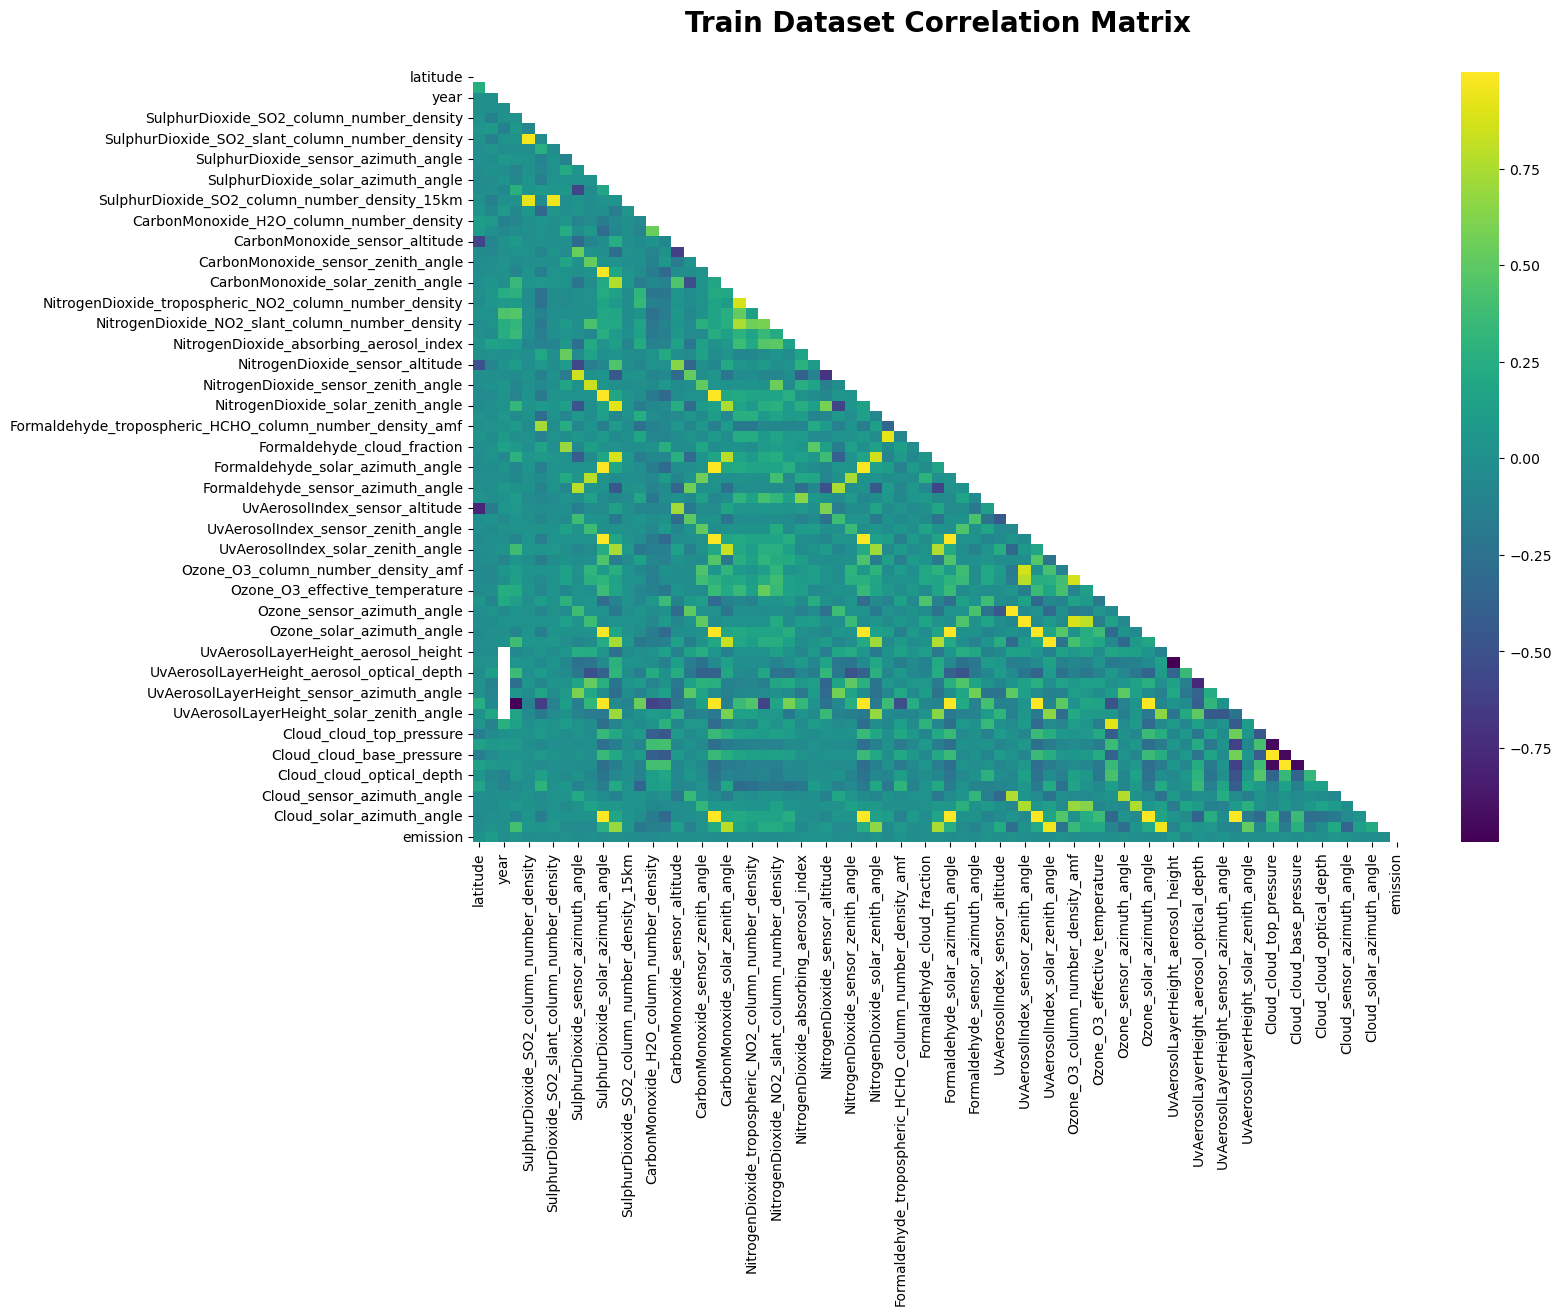

In [16]:
heatmap(train_df)

# Geographical Visualization

In [17]:
import geopandas as gpd
import folium

In [18]:
# Taken from https://www.kaggle.com/code/inversion/getting-started-eda
train_coords = train_df.drop_duplicates(subset = ['latitude', 'longitude'])
geometry = gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df = gpd.GeoDataFrame(
    train_coords[["latitude", "longitude"]], geometry=geometry
)

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each location
for coordinates in geo_df_list:

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color =  "red"),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

# Emission Trend

Text(0.5, 1.0, 'Emission Trend')

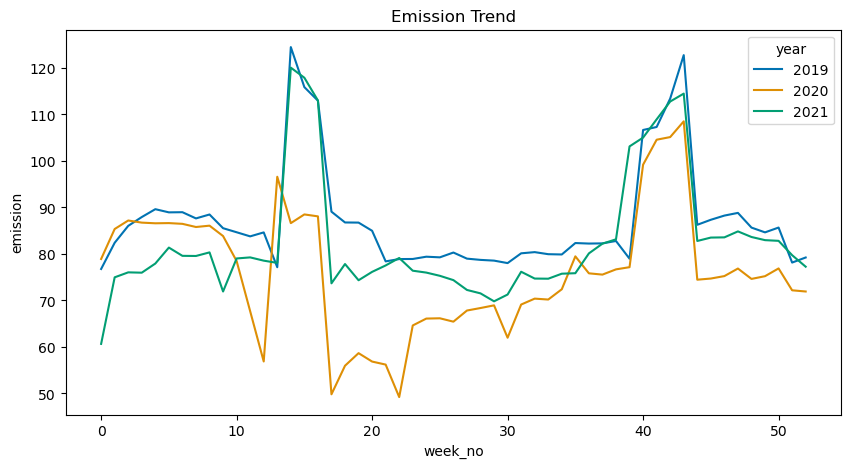

In [19]:
#palette - Method for choosing the colors to use when mapping the hue semantic.
#errorbar - The errorbar is shown as a line that extends above and below the line plot. The length of the errorbar represents the uncertainty in the data.
plt.figure(figsize=(10,5))
sns.lineplot(data=train_df,x='week_no',y='emission',hue='year',palette = 'colorblind',errorbar=None) 
plt.title('Emission Trend')

`year 2019 - There was high emission , year  2020 - it went down due to covid and lockdown , year 2021 - it rose again post lockdown when situation start becoming normal from covid.`

# Dropping missing values 

In [20]:
UvAerosolLayerHeight=[col for col in train_df.columns if 'UvAerosolLayerHeight' in col ]
UvAerosolLayerHeight

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle']

`Will be dropping these above features from train and test datset.it's having significant missing values. Out of 79023 records only 439 pressent in train datset.Out of 24353 records only 2093 present in test dataset.Hence dropping all these features. Leave other missing values feature as it is and algorithm will perform impuation.`

In [21]:
train_df=train_df.drop(['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle'],axis=1)
test_df=test_df.drop(['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle'],axis=1)

In [22]:
len(train_df.columns)

68

In [23]:
len(test_df.columns)

67

# Cross - Validation

* `K-Fold Cross-Validation:`
* In this technique of K-Fold cross-validation, the whole dataset is partitioned into K parts of equal size. Each partition is called a “Fold“.So as we have K parts we call it K-Folds. 
* One Fold is used as a validation set and the remaining K-1 folds are used as the training set.
* The technique is repeated K times until each fold is used as a validation set and the remaining folds as the training set.
* `The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data.`

In this dataset  i shall be using  two algorithm : 
* `DecisionTreeRegressor :` - Using  this algorithm we cann't apply cross- validation on whole dataset feature as we know there are columns contains null values.DecisionTreeRegressor doesn't perfom impuatation. So will pickup the feature without any null then perform cross validation.
* `XGBRegressor - Extreme Gradient Boosting Regressor` : Using this algorithm we can perform cross - validation becuase this algorithm do imputation for null values.


In [24]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor # Extreme Gradient Boosting Regressor

In [25]:
# DecisionTreeRegressor
X_dtr=train_df[['longitude', 'latitude', 'week_no']]
y_dtr=train_df['emission']
X_dts=test_df[['longitude', 'latitude', 'week_no']]

In [26]:
dtreg=DecisionTreeRegressor()
kf_dtreg=KFold(n_splits=5)
score_dtreg=cross_val_score(dtreg,X_dtr,y_dtr,cv=kf_dtreg)
print(f"Cross Validation Score :{score_dtreg}" )
print(f"Average Score :{score_dtreg.mean()}")

Cross Validation Score :[-1.67910592 -0.35538881 -0.37267877 -0.33575532 -2.62395968]
Average Score :-1.0733777000197975


In [27]:
# XGBRegressor
X_gbtr=train_df.drop('emission',axis=1)
y_gbtr=train_df['emission']
x_gbts=test_df

In [28]:
xgb=XGBRegressor(n_estimators=100,learning_rate=0.001,random_state=42)
kf=KFold(n_splits=5)
score=cross_val_score(xgb,X_gbtr,y_gbtr,cv=kf)
print(f"Cross Validation Score : {score}")
print(f"Average Score : {score.mean()}")

Cross Validation Score : [-0.33294901 -0.84275031 -0.2009964  -0.21721449 -0.52997129]
Average Score : -0.4247762984361566


# Training the Model - DecisionTreeRegressor

In [29]:
dtreg.fit(X_dtr,y_dtr)
y_dts_pred=dtreg.predict(X_dts)

In [30]:
test_result_dtr=pd.DataFrame({'ID_LAT_LON_YEAR_WEEK':ID_LAT_LON_YEAR_WEEK ,'emission':y_dts_pred})
test_result_dtr.head(2)

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.608051
1,ID_-0.510_29.290_2022_01,4.016319


# Result - DecisionTreeRegressor

In [31]:
test_result_dtr.to_csv('test_result_dtr.csv',index=False)

# Training the Model - XGBRegressor

In [32]:
xgb.fit(X_gbtr,y_gbtr)
y_gbts_pred=xgb.predict(x_gbts)

In [33]:
test_result_xgb=pd.DataFrame({'ID_LAT_LON_YEAR_WEEK':ID_LAT_LON_YEAR_WEEK ,'emission':y_gbts_pred})
test_result_xgb.head(2)

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,0.628325
1,ID_-0.510_29.290_2022_01,0.628325


# Result - XGBRegressor

In [34]:
test_result_xgb.to_csv('test_result_xgb',index=False)

# References
* https://www.kaggle.com/code/iqbalsyahakbar/ps3e20-time-series-for-beginners/notebook
* https://www.kaggle.com/code/inversion/getting-started-eda
* Cross-Validation(CV) - https://www.analyticsvidhya.com/blog/2021/11/top-7-cross-validation-techniques-with-python-code/
* Imputation - https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/

# Thank You :)